# Form Recognizer

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from azure.ai.formrecognizer import FormRecognizerClient
from azure.core.credentials import AzureKeyCredential

### Establish a connection with Azure Resource Group

In [2]:
key = "8fc98783bb944d138b9fcf6bec58a5c6"
endpoint = "https://form-recog-in.cognitiveservices.azure.com/"  

form_recognizer_client = FormRecognizerClient(endpoint, AzureKeyCredential(key))

### 1. Method : "being_recognize_receipts()"

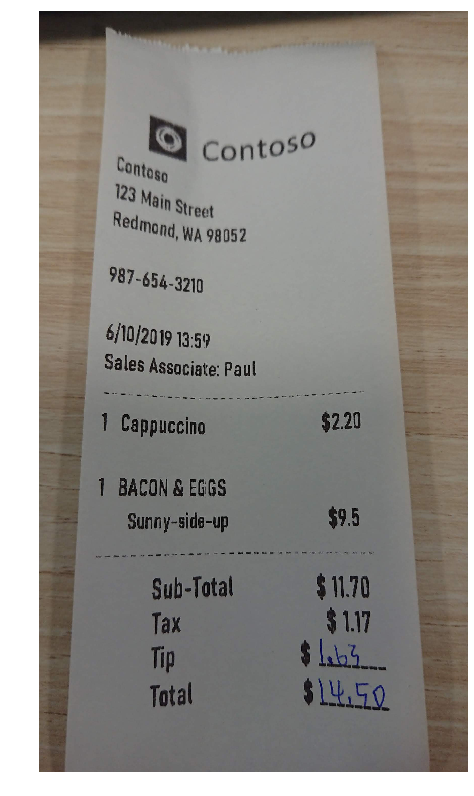

In [3]:
path_to_sample_receipt = "receipt.png"
receipt_img = cv2.imread(path_to_sample_receipt)
receipt_img = cv2.cvtColor(receipt_img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,14))
plt.imshow(receipt_img)
plt.axis("off")
plt.show()

In [5]:
path_to_sample_receipt = "receipt.png"
with open(path_to_sample_receipt, "rb") as r:
    poller = form_recognizer_client.begin_recognize_receipts(receipt = r)

result = poller.result()

for receipt in result:
    for name, field in receipt.fields.items():
        if name == "Items":
            print("Receipt Items:")
            for idx, items in enumerate(field.value):
                print("...Item #{}".format(idx + 1))
                for item_name, item in items.value.items():
                    print("......{}: {}".format(item_name, item.value))
        else:
            print("{}: {}".format(name, field.value))

ReceiptType: Itemized
MerchantName: Contoso Contoso
MerchantAddress: 123 Main Street Redmond, WA 98052
MerchantPhoneNumber: +19876543210
TransactionDate: 2020-06-10
TransactionTime: 13:59:00
Receipt Items:
...Item #1
......Quantity: 1.0
......Name: Cappuccino
......TotalPrice: 2.2
...Item #2
......Quantity: 1.0
......Name: BACON & EGGS
......TotalPrice: 9.5
Subtotal: 11.7
Tax: 1.17
Tip: 1.63
Total: 14.5


### 2. Method : "begin_recognize_business_cards()"

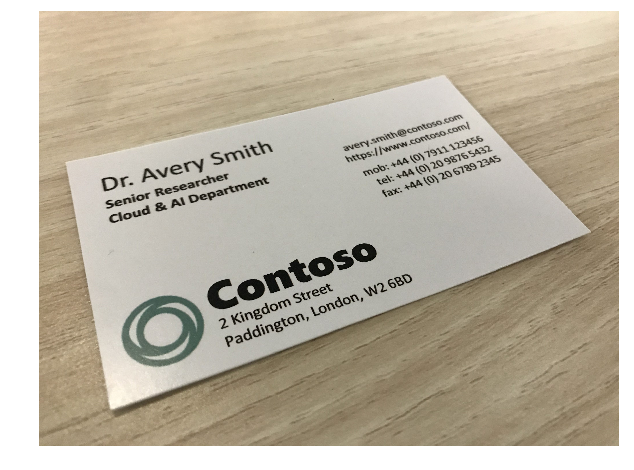

In [16]:
path_to_sample_card = "business_card.jpg"
card_img = cv2.imread(path_to_sample_card)
card_img = cv2.cvtColor(card_img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(14, 8))
plt.imshow(card_img)
plt.axis("off")
plt.show()

In [18]:
with open(path_to_sample_card, "rb") as c:
    poller = form_recognizer_client.begin_recognize_business_cards(business_card = c)
    
business_cards = poller.result()

for idx, business_card in enumerate(business_cards):
    print("--------Recognizing business card #{}--------".format(idx+1))
    contact_names = business_card.fields.get("ContactNames")
    if contact_names:
        for contact_name in contact_names.value:
            print("Contact First Name: {} ".format(contact_name.value["FirstName"].value))
            print("Contact Last Name: {} ".format(contact_name.value["LastName"].value))
    company_names = business_card.fields.get("CompanyNames")
    if company_names:
        for company_name in company_names.value:
            print("Company Name: {} ".format(company_name.value))
    departments = business_card.fields.get("Departments")
    if departments:
        for department in departments.value:
            print("Department: {} ".format(department.value))
    job_titles = business_card.fields.get("JobTitles")
    if job_titles:
        for job_title in job_titles.value:
            print("Job Title: {} ".format(job_title.value))
    emails = business_card.fields.get("Emails")
    if emails:
        for email in emails.value:
            print("Email: {} ".format(email.value))
    websites = business_card.fields.get("Websites")
    if websites:
        for website in websites.value:
            print("Website: {} ".format(website.value))
    addresses = business_card.fields.get("Addresses")
    if addresses:
        for address in addresses.value:
            print("Address: {} ".format(address.value))
    mobile_phones = business_card.fields.get("MobilePhones")
    if mobile_phones:
        for phone in mobile_phones.value:
            print("Mobile phone number: {} ".format(phone.value))
    faxes = business_card.fields.get("Faxes")
    if faxes:
        for fax in faxes.value:
            print("Fax number: {} ".format(fax.value))
    work_phones = business_card.fields.get("WorkPhones")
    if work_phones:
        for work_phone in work_phones.value:
            print("Work phone number: {} ".format(work_phone.value))
    other_phones = business_card.fields.get("OtherPhones")
    if other_phones:
        for other_phone in other_phones.value:
            print("Other phone number: {} ".format(other_phone.value))

--------Recognizing business card #1--------
Contact First Name: Avery 
Contact Last Name: Smith 
Company Name: Contoso 
Department: Cloud & Al Department 
Job Title: Senior Researcher 
Email: avery.smith@contoso.com 
Website: https://www.contoso.com/ 
Address: 2 Kingdom Street Paddington, London, W2 6BD 
Mobile phone number: None 
Fax number: None 
Other phone number: None 


### 3. Method : "begin_recognize_invoices()"

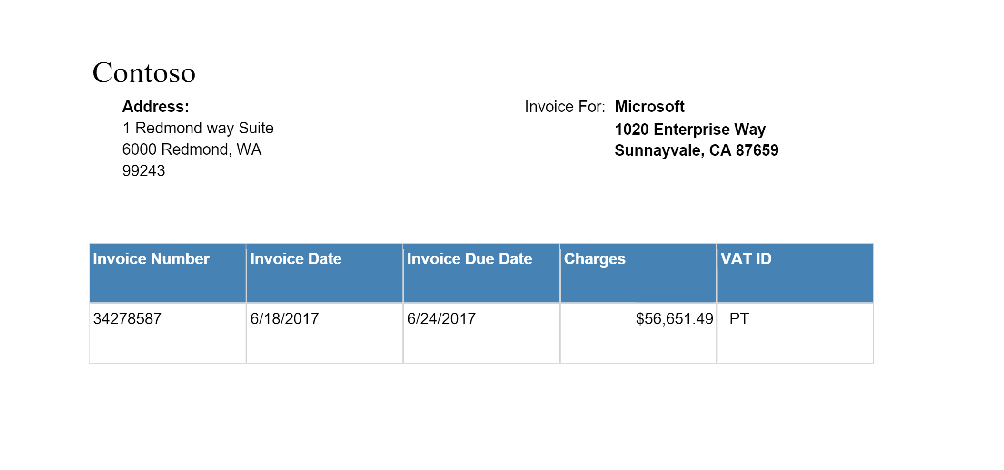

In [21]:
path_to_sample_invoice = "invoice.png"
invoice_img = cv2.imread(path_to_sample_invoice)
invoice_img = cv2.cvtColor(invoice_img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(18, 8))
plt.imshow(invoice_img)
plt.axis("off")
plt.show()

In [22]:

with open(path_to_sample_invoice, "rb") as i:
    poller = form_recognizer_client.begin_recognize_invoices(invoice = i)

invoices = poller.result()

for idx, invoice in enumerate(invoices):
    print("--------Recognizing invoice #{}--------".format(idx+1))
    vendor_name = invoice.fields.get("VendorName")
    if vendor_name:
        print("Vendor Name: {} ".format(vendor_name.value))
    vendor_address = invoice.fields.get("VendorAddress")
    if vendor_address:
        print("Vendor Address: {} ".format(vendor_address.value))
    customer_name = invoice.fields.get("CustomerName")
    if customer_name:
        print("Customer Name: {} ".format(customer_name.value))
    customer_address = invoice.fields.get("CustomerAddress")
    if customer_address:
        print("Customer Address: {} ".format(customer_address.value))
    customer_address_recipient = invoice.fields.get("CustomerAddressRecipient")
    if customer_address_recipient:
        print("Customer Address Recipient: {} ".format(customer_address_recipient.value))
    invoice_id = invoice.fields.get("InvoiceId")
    if invoice_id:
        print("Invoice Id: {} ".format(invoice_id.value))
    invoice_date = invoice.fields.get("InvoiceDate")
    if invoice_date:
        print("Invoice Date: {} ".format(invoice_date.value))
    invoice_total = invoice.fields.get("InvoiceTotal")
    if invoice_total:
        print("Invoice Total: {} ".format(invoice_total.value))
    due_date = invoice.fields.get("DueDate")
    if due_date:
        print("Due Date: {} ".format(due_date.value))

--------Recognizing invoice #1--------
Vendor Name: Contoso 
Vendor Address: 1 Redmond way Suite 6000 Redmond, WA 99243 
Customer Name: Microsoft 
Customer Address: 1020 Enterprise Way Sunnayvale, CA 87659 
Customer Address Recipient: Microsoft 
Invoice Id: 34278587 
Invoice Date: 2017-06-18 
Invoice Total: 56651.49 
Due Date: 2017-06-24 


### 4. Method : "begin_recognize_content()"
- Recognize  layout such as Tables

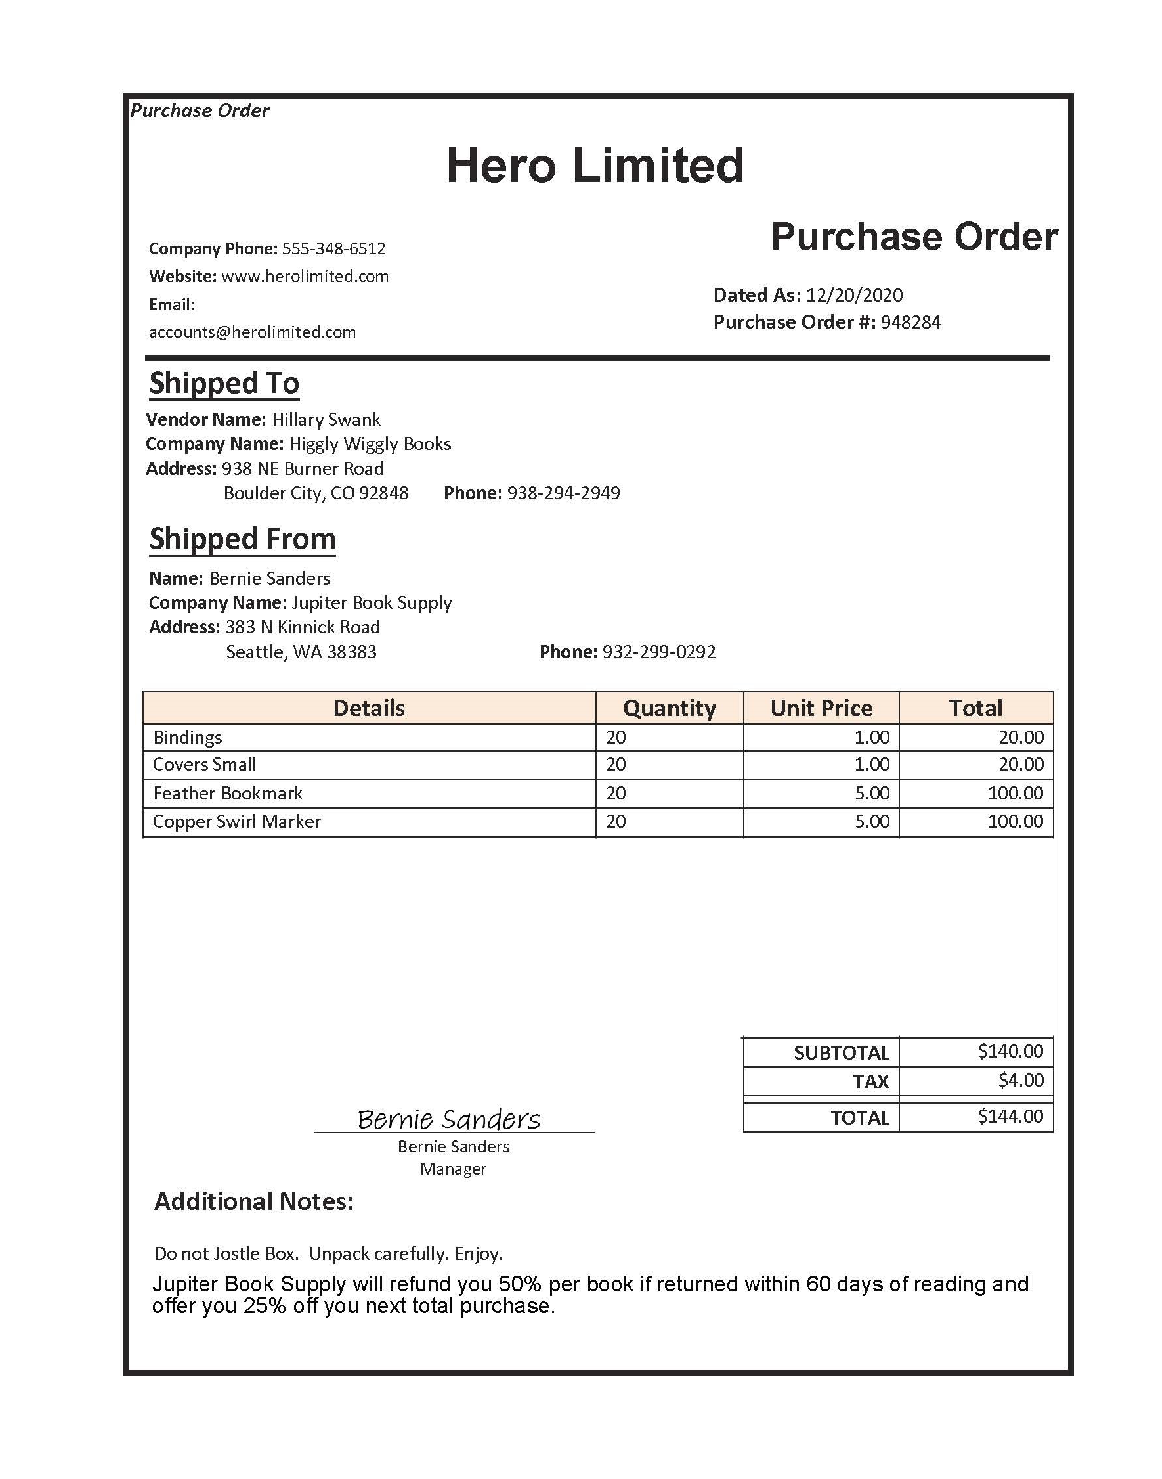

In [36]:
path_to_sample_content = "content.jpg"
content_img = cv2.imread(path_to_sample_content)
content_img = cv2.cvtColor(content_img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 28))
plt.imshow(content_img)
plt.axis("off")
plt.show()

In [42]:
with open(path_to_sample_content, "rb") as con:
    poller = form_recognizer_client.begin_recognize_content(form = con)

page = poller.result()
table = page[0].tables[0] # page 1, table 1
print("Table found on page {}:".format(table.page_number))
print("Table location {}:".format(table.bounding_box))
for cell in table.cells:
    print("Cell text: {}, row_index: {}, column_index: {}".format(cell.text, cell.row_index, cell.column_index))

Table found on page 1:
Table location [Point(x=153.0, y=1036.0), Point(x=1547.0, y=1037.0), Point(x=1547.0, y=1265.0), Point(x=153.0, y=1265.0)]:
Cell text: Details, row_index: 0, column_index: 0
Cell text: Quantity, row_index: 0, column_index: 2
Cell text: Unit Price, row_index: 0, column_index: 3
Cell text: Total, row_index: 0, column_index: 4
Cell text: Bindings, row_index: 1, column_index: 0
Cell text: 20, row_index: 1, column_index: 2
Cell text: 1.00, row_index: 1, column_index: 3
Cell text: 20.00, row_index: 1, column_index: 4
Cell text: Covers Small, row_index: 2, column_index: 0
Cell text: 20, row_index: 2, column_index: 2
Cell text: 1.00, row_index: 2, column_index: 3
Cell text: 20.00, row_index: 2, column_index: 4
Cell text: Feather Bookmark, row_index: 3, column_index: 0
Cell text: 20, row_index: 3, column_index: 2
Cell text: 5.00, row_index: 3, column_index: 3
Cell text: 100.00, row_index: 3, column_index: 4
Cell text: Copper Swirl Marker, row_index: 4, column_index: 0
Cell

 - row index and column index helps in understanding the structure of table.